In [502]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from matplotlib.animation import FuncAnimation, PillowWriter

In [503]:
class Wave_packet:

    def __init__(self, N, x0, sigma0, x_begin, x_end, k0=0):

        self.N = N
        self.x0 = x0
        self.sigma0 = sigma0
        self.x_begin = x_begin
        self.x_end = x_end
        self.k0 = k0

        self.x, self.dx = np.linspace(self.x_begin, self.x_end, self.N, retstep=True)

    def packet(self):
        self.psi0 = np.exp(-(self.x-self.x0)**2/(2*self.sigma0)**2) * np.exp(-1j * self.k0 * self.x)
        norm = np.sum(np.abs(self.psi0)**2*self.dx, axis=0)
        self.psi0 = self.psi0 / np.sqrt(norm)
        return self.psi0


In [504]:
def potential(x, plek1, plek2, barriere1, barriere2, volt=1,):
     a = -volt / (plek2-plek1)
     k1 = (barriere1 + barriere2 + volt + a*(x-plek1)) * ((x >= plek1)* (x <= plek2))
     k2 = (volt + barriere2) * ((x >= x[0]) * (x < plek1))

     return k1 + k2

In [505]:
packet = Wave_packet(5000, 20, 5, -1500, 1500, k0=-1)

x = packet.x
dx = packet.dx

V = potential(x, 72.5, 77.5, 1, 0.5, volt=1)

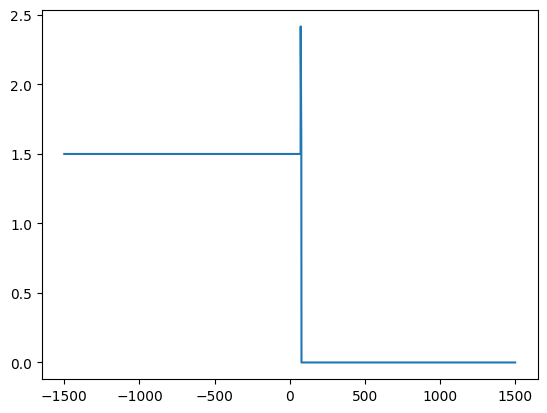

In [506]:
plt.plot(x, V)

In [507]:
def get_e(x, dx, V):
    main = 1/dx**2 + V
    off = -1/(2*dx**2) * np.ones(len(main)-1)

    E, psi = eigh_tridiagonal(main, off)

    psi = psi.T

    norm = np.sum(np.abs(psi)**2 * dx, axis=0)
    psi = psi/np.sqrt(norm)

    return E, psi

In [508]:
def get_t(E, psi, psi0, t):

    cn = np.zeros_like(psi[0], dtype=complex)

    for j in range(0, len(psi)):

        cn[j] = np.sum(np.conj(psi[j]) * psi0 * dx)

    psi_t = psi.T@(cn*np.exp(-1j*E*t))
    norm = np.sum(np.abs(psi_t)**2 * dx)
    psi_t = psi_t/np.sqrt(norm)
    return psi_t

In [509]:
psi0 = packet.packet()
E, psi = get_e(x, dx, V)
t = np.linspace(0,25, 1000)
psi_t = get_t(E, psi, psi0, 120)

(0.0, 150.0)

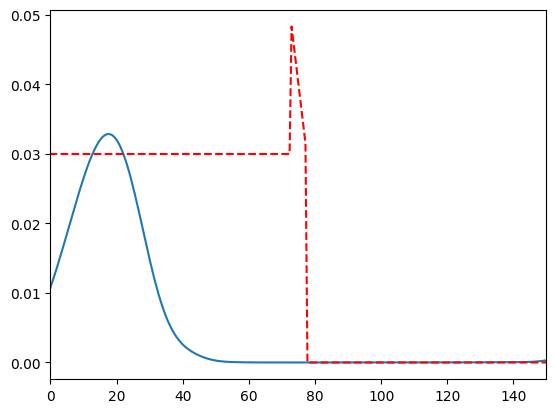

In [510]:
plt.plot(x, np.abs(psi_t)**2)
plt.plot(x, V/50, 'r--')
plt.xlim([0, 150])

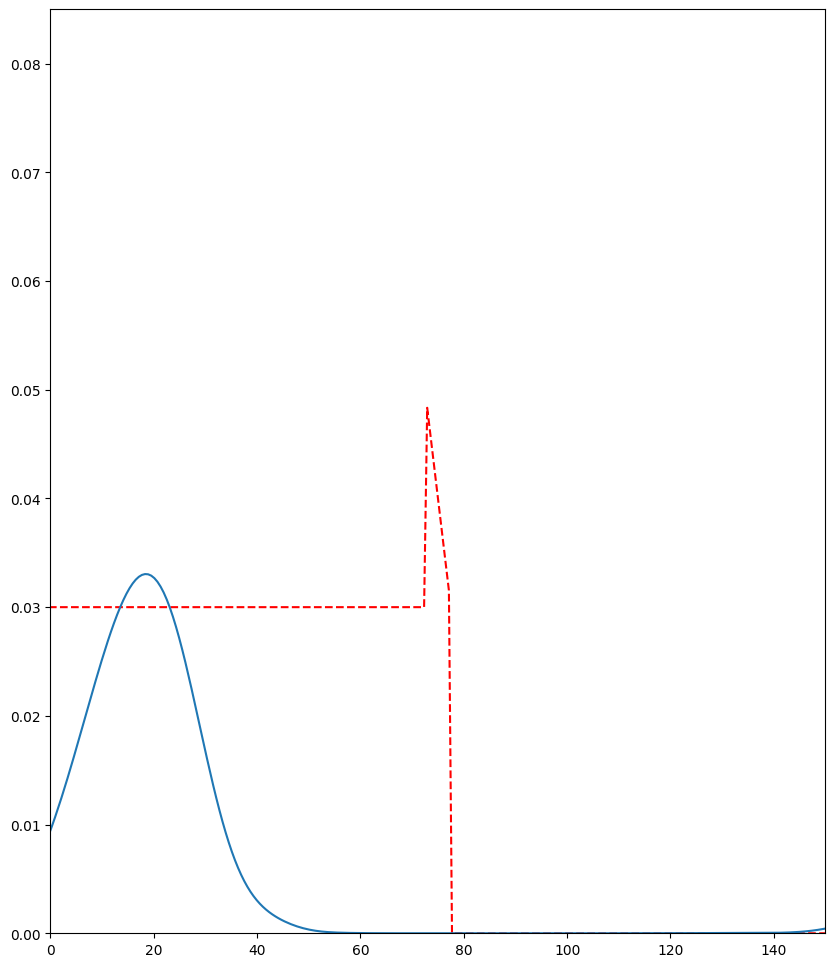

In [511]:
fig = plt.figure(figsize = (10, 12))
ax = plt.axes(xlim=(0,150), ylim=(0, 0.085))
ax.plot(x, V/50, 'r--')

ln, = ax.plot([],[])

def animate(i):

    ln.set_data(x, np.abs(get_t(E, psi, psi0, i))**2)
    return ln,

ani =  FuncAnimation(fig, animate, frames = 120, interval = 50, blit=False)

ani.save('test.gif', writer='pillow', fps=30, dpi=100)

plt.show()

In [512]:
psi_l = get_t(E, psi, psi0, 120)[x <= 75]
psi_r = get_t(E, psi, psi0, 120)[x > 75]
psi_t = get_t(E, psi, psi0, 120)

In [513]:
T = np.sum(np.abs(psi_r)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx))
R = np.sum(np.abs(psi_l)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx))

In [514]:
T

0.10944418592232347

In [515]:
R

0.8905558140776765

In [516]:
T+R

1.0

In [517]:
plek1 = np.linspace(0,10,10)
plek2 = np.linspace(0,2,10)

T = {}
R = {}

for i in range(len(plek2)):
    t = []
    r = []
    for j in plek1:
        V = potential(x, 72.5, 77.5, plek2[i], j, volt=1)
        E, psi = get_e(x, dx, V)
        psi_l = get_t(E, psi, psi0, 120)[x <= 75]
        psi_r = get_t(E, psi, psi0, 120)[x > 75]
        psi_t = get_t(E, psi, psi0, 120)
        t.append(np.sum(np.abs(psi_r)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx)))
        r.append(np.sum(np.abs(psi_l)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx)))
    T[i] = t
    R[i] = r

(0.0, 1.1)

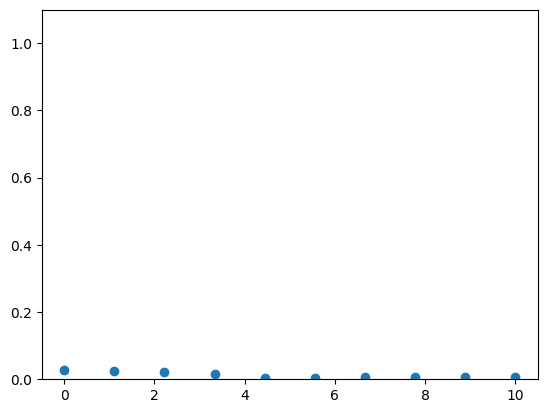

In [524]:
plt.scatter(plek1, T[5])
plt.ylim([0, 1.1])

In [ ]:
T[9]

[0.894460576545847,
 0.894460422049781,
 0.8944602819261521,
 0.894460153560074,
 0.8944600348378886,
 0.8944599240277594,
 0.8944598196822525,
 0.8944597205598296,
 0.89445962555947,
 0.8944595336617647]